In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv("retail_price.csv")
data.head(10)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,bed_bath_table,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,bed_bath_table,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,bed_bath_table,01-12-2017,6,239.94,15.230000,39.990000,39,161,2,...,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [4]:
data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [8]:
from sklearn.preprocessing import StandardScaler

In [6]:

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
##1. Can we predict total_price using features like qty, freight_price, and unit_price?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = data[['qty', 'freight_price', 'unit_price']]
y = data['total_price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 521493.87744270527


In [ ]:
##2. Can we classify whether a transaction occurs on a weekend (weekend column) based on features like qty, unit_price, and freight_price?


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and target variable
X = data[['qty', 'unit_price', 'freight_price']]
y = data['weekend']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           8       0.48      0.52      0.50        71
           9       0.28      0.36      0.31        44
          10       0.00      0.00      0.00        21

    accuracy                           0.39       136
   macro avg       0.25      0.29      0.27       136
weighted avg       0.34      0.39      0.36       136



In [ ]:
##3. What clusters exist in product features like unit_price, freight_price, and product_weight_g?

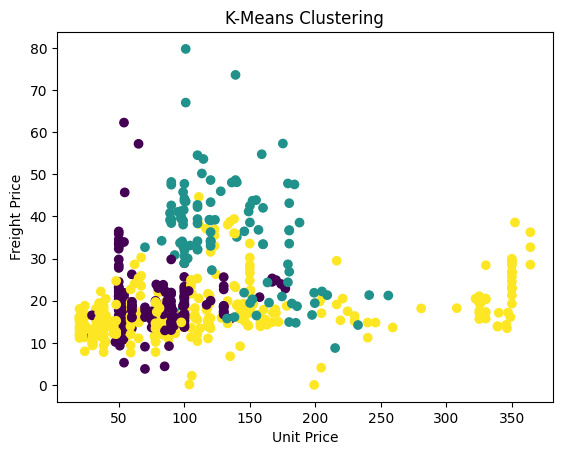

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Features for clustering
X = data[['unit_price', 'freight_price', 'product_weight_g']]

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize clusters (2D projection)
plt.scatter(data['unit_price'], data['freight_price'], c=data['cluster'], cmap='viridis')
plt.xlabel('Unit Price')
plt.ylabel('Freight Price')
plt.title('K-Means Clustering')
plt.show()


In [ ]:
##4. What is the relationship between freight_price and product_weight_g?

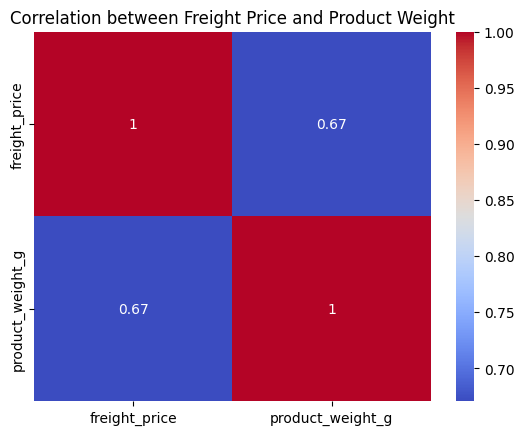

In [13]:
import seaborn as sns

# Correlation heatmap
sns.heatmap(data[['freight_price', 'product_weight_g']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Freight Price and Product Weight')
plt.show()


In [ ]:
##5. Feature Importance for Predicting total_price

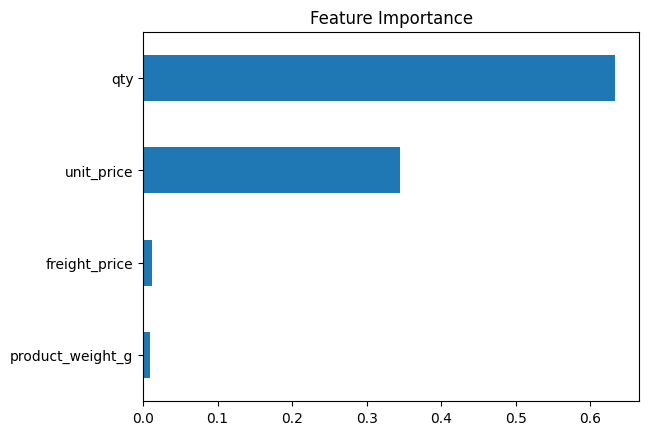

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = data[['qty', 'freight_price', 'unit_price', 'product_weight_g']]
y = data['total_price']

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature Importance
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()


In [ ]:
##Remove Null Values


In [15]:
# Check for null values
print("Number of null values per column:")
print(data.isnull().sum())

# Drop rows with any null values
data_cleaned = data.dropna()

# Verify if there are still any null values
print("\nNumber of null values after cleaning:")
print(data_cleaned.isnull().sum())


Number of null values per column:
product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
cluste

In [20]:
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
cluster                       0
dtype: i

In [23]:
data_filled = data.fillna(data.select_dtypes(include=['int64', 'float64']).mean())
data_filled

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,cluster
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000,2
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000,2
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000,2
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000,2
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000,1
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000,1
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000,1
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000,1


In [ ]:
##Can we predict total_price based on features such as qty, freight_price, and unit_price?

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (independent variables) and target variable (dependent variable)
X = data[['qty', 'freight_price', 'unit_price']]
y = data['total_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

# Coefficients of the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print("\nCoefficients:")
print(coefficients)


Linear Regression Results:
Mean Squared Error (MSE): 521493.88
R-Squared (R²): 0.83

Coefficients:
         Feature  Coefficient
0            qty    88.857034
1  freight_price     5.652462
2     unit_price    10.676294


In [ ]:
##Can we improve the prediction of total_price using polynomial regression with features like qty, freight_price, and unit_price?

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = data[['qty', 'freight_price', 'unit_price']]
y = data['total_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the Linear Regression model on transformed data
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Polynomial Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

# Get feature names for the polynomial features
feature_names = poly.get_feature_names_out(X.columns)
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': poly_model.coef_
})
print("\nCoefficients:")
print(coefficients)


Polynomial Regression Results:
Mean Squared Error (MSE): 22.97
R-Squared (R²): 1.00

Coefficients:
                    Feature  Coefficient
0                       qty     0.144234
1             freight_price     0.031916
2                unit_price     0.022594
3                     qty^2    -0.000991
4         qty freight_price    -0.001881
5            qty unit_price     1.000172
6           freight_price^2     0.000192
7  freight_price unit_price    -0.000416
8              unit_price^2    -0.000041


In [ ]:
##Can we predict whether a transaction occurred on a weekend (weekend column) based on features like qty, unit_price, and freight_price?



Decision Tree Accuracy: 0.44

Classification Report:
              precision    recall  f1-score   support

           8       0.56      0.44      0.49        71
           9       0.37      0.66      0.48        44
          10       0.00      0.00      0.00        21

    accuracy                           0.44       136
   macro avg       0.31      0.37      0.32       136
weighted avg       0.41      0.44      0.41       136



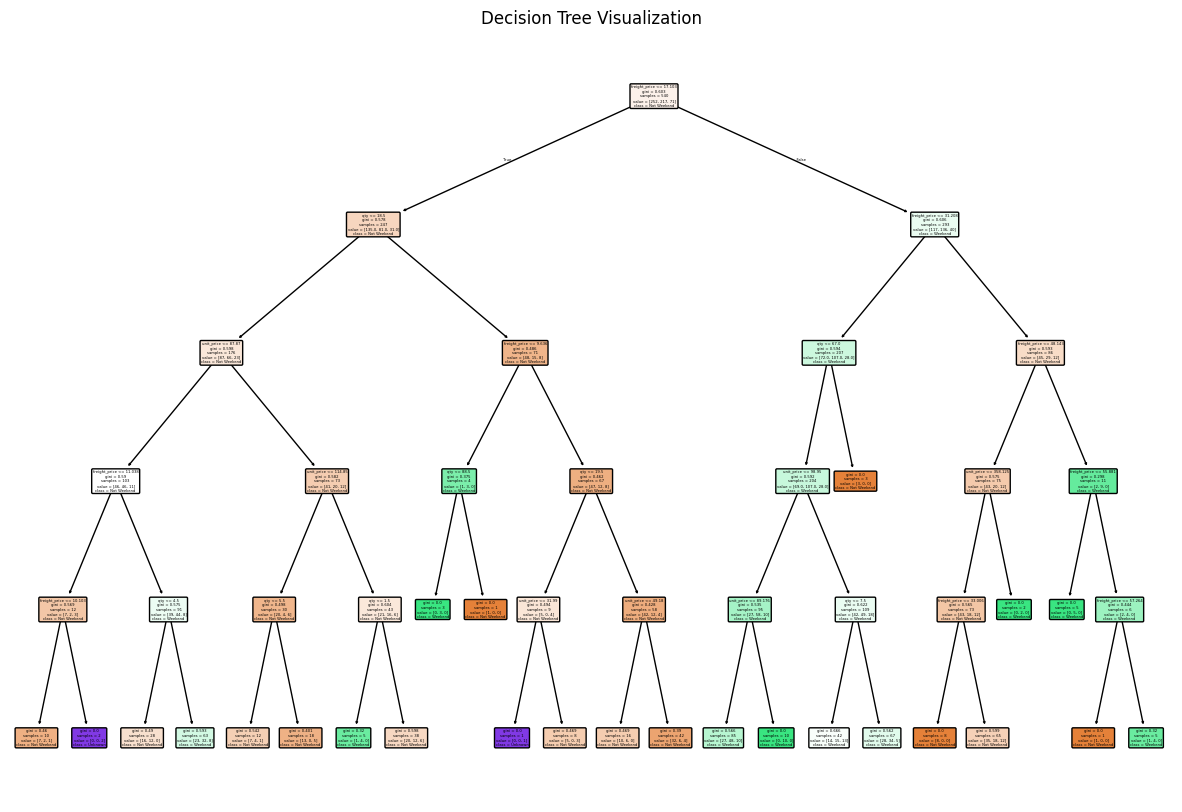

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Select features and target variable
X = data[['qty', 'unit_price', 'freight_price']]
y = data['weekend']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Weekend', 'Weekend', 'Unknown'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
